# Install dependencies and imports

In [1]:
# Check which GPU we're using
!nvidia-smi

Wed Feb 16 12:35:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install transformers torch seaborn

     |████████████████████████████████| 3.5 MB 13.7 MB/s 
     |████████████████████████████████| 596 kB 72.5 MB/s 
     |████████████████████████████████| 895 kB 68.6 MB/s 
     |████████████████████████████████| 67 kB 7.1 MB/s 
     |████████████████████████████████| 6.8 MB 51.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

if torch.cuda.is_available():
  DEVICE = "cuda:0"
else:
  DEVICE = "cpu"

In [4]:
!wget -nc https://www.doc.ic.ac.uk/~tn4618/dontpatronizeme_v1.4.zip
!unzip -o dontpatronizeme_v1.4.zip

--2022-02-16 12:35:46--  https://www.doc.ic.ac.uk/~tn4618/dontpatronizeme_v1.4.zip
Resolving www.doc.ic.ac.uk (www.doc.ic.ac.uk)... 146.169.13.6
Connecting to www.doc.ic.ac.uk (www.doc.ic.ac.uk)|146.169.13.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1407008 (1.3M) [application/zip]
Saving to: ‘dontpatronizeme_v1.4.zip’

dontpatronizeme_v1. 100%[===================>]   1.34M  --.-KB/s    in 0.07s   

2022-02-16 12:35:46 (19.9 MB/s) - ‘dontpatronizeme_v1.4.zip’ saved [1407008/1407008]

Archive:  dontpatronizeme_v1.4.zip
   creating: dontpatronizeme_v1.4/
  inflating: dontpatronizeme_v1.4/README.txt  
  inflating: dontpatronizeme_v1.4/dontpatronizeme_categories.tsv  
  inflating: dontpatronizeme_v1.4/dontpatronizeme_pcl.tsv  


In [5]:
df_categories = pd.read_csv(
    './dontpatronizeme_v1.4/dontpatronizeme_categories.tsv', 
    skiprows=4, 
    sep='\t',
    index_col=False,
    names=['par_id', 'art_id', 'text', 'keyword', 'country_code', 'span_start', 'span_finish', 'span_text', 'pcl_category', 'number_of_annotators']
    )
df_categories.head()

,par_id,art_id,text,keyword,country_code,span_start,span_finish,span_text,pcl_category,number_of_annotators
0,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,201,236,put their situation in perspective,Authority_voice,2
1,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,240,274,help them communicate with others,Unbalanced_power_relations,2
2,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,274,300,who could provide support,Unbalanced_power_relations,1
3,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,384,434,plan for their needs and the needs of their child,Authority_voice,2
4,4046,@@14767805,We also know that they can benefit by receivin...,hopeless,us,0,35,We also know that they can benefit,Unbalanced_power_relations,1


In [6]:
df_pcl = pd.read_csv(
    './dontpatronizeme_v1.4/dontpatronizeme_pcl.tsv', 
    skiprows=4,
    sep='\t',
    index_col=False,
    names=['par_id', 'art_id', 'keyword', 'country_code', 'text', 'label']
    )
df_pcl.head()

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


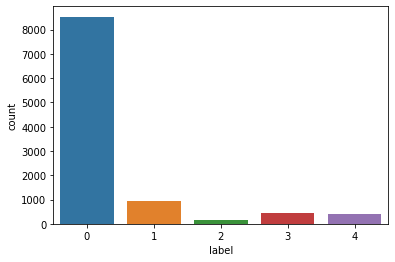

In [11]:
sns.countplot(x="label", data=df_pcl)